In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wayne870811","key":"0dffa351aab0ccaac6e2c5aa37c62b58"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
#! kaggle datasets list
from google.colab import drive
import os
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
os.chdir("/content/gdrive/My Drive") #更改路徑到雲端硬碟
os.getcwd() #查看當前路徑

'/content/gdrive/My Drive'

In [14]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:14<00:00, 32.2MB/s]
100% 612M/612M [00:14<00:00, 43.5MB/s]


In [12]:
! mkdir traffic_sign_dataset

mkdir: cannot create directory ‘traffic_sign_dataset’: File exists


In [15]:
! unzip gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00024.png  
  inflating: traffic_sign

In [ ]:
os.chdir("/content") #更改路徑到雲端硬碟
!cp -R ./gdrive/'My Drive'/traffic_sign_dataset dataset

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = 'dataset'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 13s 426us/step - loss: 1.8361 - accuracy: 0.5314 - val_loss: 0.4347 - val_accuracy: 0.9132
Epoch 2/15
31367/31367 [==============================] - 7s 215us/step - loss: 0.5383 - accuracy: 0.8513 - val_loss: 0.1199 - val_accuracy: 0.9695
Epoch 3/15
31367/31367 [==============================] - 7s 214us/step - loss: 0.3338 - accuracy: 0.9055 - val_loss: 0.0709 - val_accuracy: 0.9810
Epoch 4/15
31367/31367 [==============================] - 7s 216us/step - loss: 0.2843 - accuracy: 0.9216 - val_loss: 0.0670 - val_accuracy: 0.9834
Epoch 5/15
31367/31367 [==============================] - 7s 217us/step - loss: 0.2756 - accuracy: 0.9265 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 6/15
31367/31367 [==============================] - 7s 213us/step - loss: 0.2410 - accuracy: 0.9347 - val_loss: 0.0556 - val_accuracy: 0.9847
Epoch 7/15
31367/31367 [==============================] - 7s 2

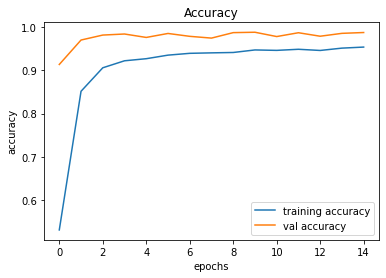

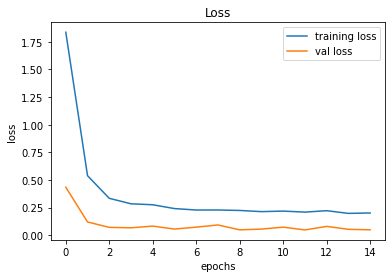

In [ ]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [86]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv(cur_path + '/' + 'Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(path + '/'+ a)
    image = Image.open(cur_path + '/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9460015835312747


In [71]:
Y_test = pd.get_dummies(labels) #使用Pandas進行One hot encoding
evaluate = model.evaluate(X_test, Y_test, batch_size=40)
print("test evaluate: {}".format(evaluate))

12630/12630 [==============================] - 1s 80us/step
test evaluate: [0.2582224326349075, 0.9460015892982483]


In [68]:
model.save("traffic_classifier.h5")

In [1]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [4]:
#dictionary to label all traffic signs class.
classes = { 1:'限速 (20km/h)',
            2:'限速 (30km/h)',      
            3:'限速 (50km/h)',       
            4:'限速 (60km/h)',      
            5:'限速 (70km/h)',    
            6:'限速 (80km/h)',      
            7:'限速結束 (80km/h)',     
            8:'限速 (100km/h)',    
            9:'限速 (120km/h)',     
           10:'禁止通行',   
           11:'車重3.5噸以上 禁止通行',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'停止',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'禁止進入',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [7]:
from google.colab import files
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


Saving 00008.png to 00008.png
(1, 30, 30, 3)

RESULT: Road work



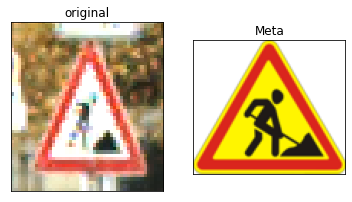

Saving 00020.png to 00020.png
(1, 30, 30, 3)

RESULT: 限速 (70km/h)



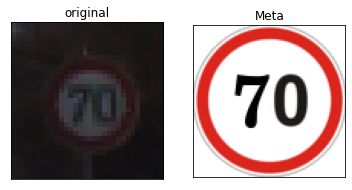

IndexError: ignored

In [72]:
def getList(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
          
    return list

def display(a, b, title1 = "Original", title2 = "Edited"):
      plt.subplot(121), plt.imshow(a), plt.title(title1)
      plt.xticks([]), plt.yticks([])
      plt.subplot(122), plt.imshow(b), plt.title(title2)
      plt.xticks([]), plt.yticks([])
      plt.show()
    
while(1):
  image2_path = files.upload()
  key = getList(image2_path)[0] #獲得檔案名稱

  from PIL import Image
  image2 = Image.open(key)
  image2 = image2.resize((30,30))
  image2 = np.expand_dims(image2, axis=0)
  image2 = np.array(image2)
  print(image2.shape)
  pred = model.predict_classes([image2])[0]
  sign = classes[pred+1]
  print('\nRESULT: ' + sign + '\n')
  im1 = Image.open(str(key))
  im2 = Image.open('Meta/' + str(pred) + '.png')

  display(im1, im2, 'original', 'Meta')
  print('====================================================\n')
  os.remove(key)

In [55]:
os.chdir("/content") #更改路徑到雲端硬碟
!cp -R ./drive/'My Drive'/traffic_sign_dataset/Meta .
!cp ./drive/'My Drive'/traffic_sign_dataset/traffic_classifier.h5 .

In [53]:
!rm -R ./Meta